In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
corr = data[data.columns[0:11]].corr()

<AxesSubplot:>

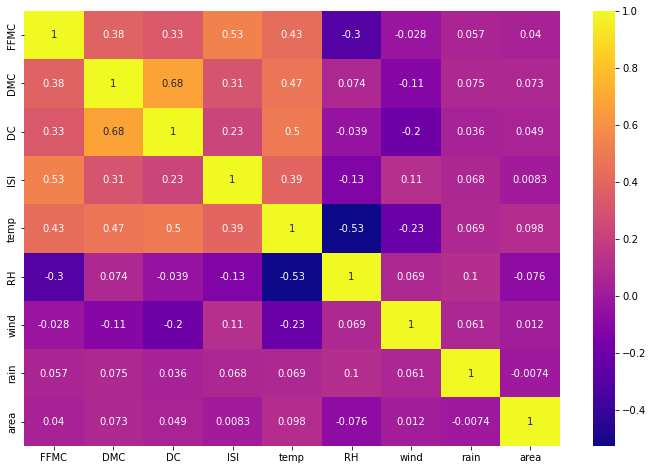

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='plasma', annot=True)

<AxesSubplot:xlabel='area'>

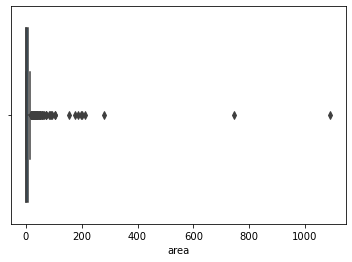

In [9]:
sns.boxplot(data['area'])

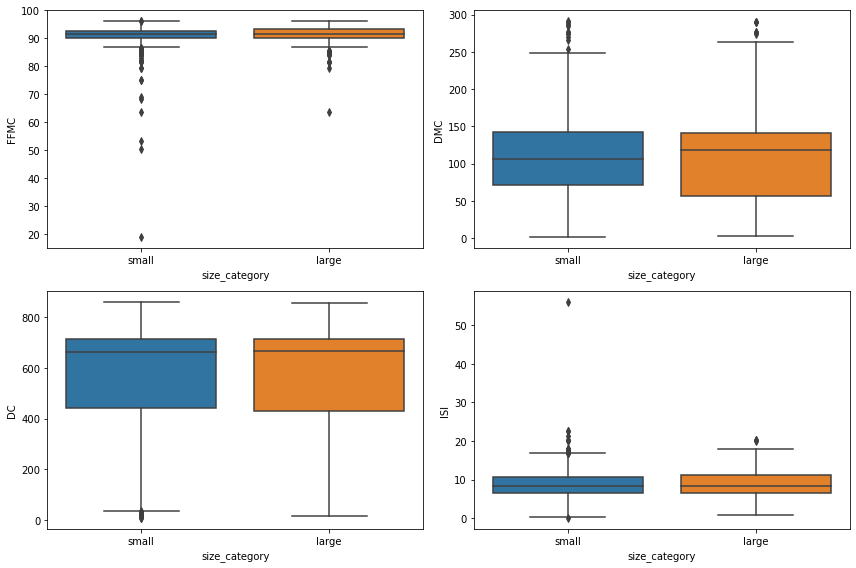

In [10]:
plt.figure(figsize=(12, 8))

# Boxplot for FFMC vs Size_Category
plt.subplot(2, 2, 1)
sns.boxplot(x='size_category', y='FFMC', data=data)

# Boxplot for DMC vs Size_Category
plt.subplot(2, 2, 2)
sns.boxplot(x='size_category', y='DMC', data=data)

# Boxplot for DC vs Size_Category
plt.subplot(2, 2, 3)
sns.boxplot(x='size_category', y='DC', data=data)

# Boxplot for ISI vs Size_Category
plt.subplot(2, 2, 4)
sns.boxplot(x='size_category', y='ISI', data=data)

plt.tight_layout()
plt.show()

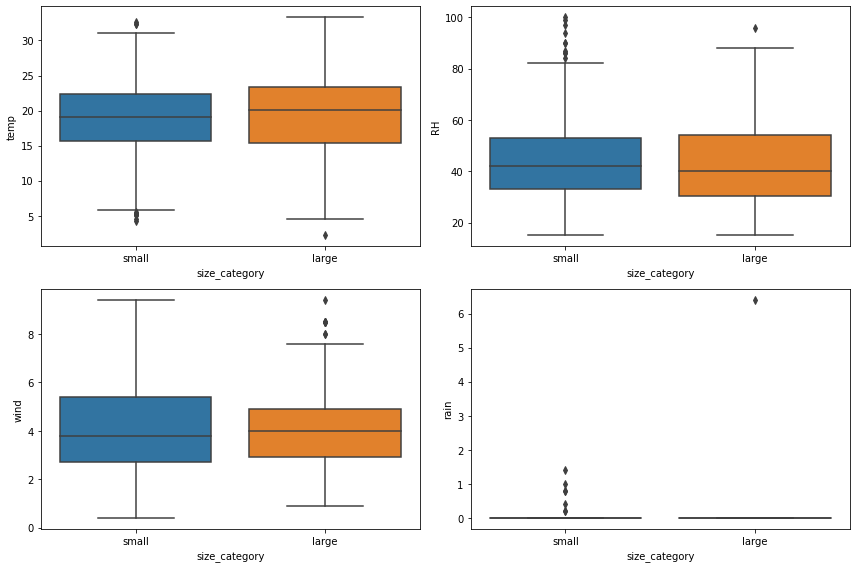

In [11]:
plt.figure(figsize=(12, 8))

# Boxplot for FFMC vs Size_Category
plt.subplot(2, 2, 1)
sns.boxplot(x='size_category', y='temp', data=data)

# Boxplot for DMC vs Size_Category
plt.subplot(2, 2, 2)
sns.boxplot(x='size_category', y='RH', data=data)

# Boxplot for DC vs Size_Category
plt.subplot(2, 2, 3)
sns.boxplot(x='size_category', y='wind', data=data)

# Boxplot for ISI vs Size_Category
plt.subplot(2, 2, 4)
sns.boxplot(x='size_category', y='rain', data=data)

plt.tight_layout()
plt.show()

In [12]:
X = data.iloc[:, 2:30]
Y = data.iloc[:, 30]

In [13]:
mapping = {'small': 1, 'large': 2}

In [14]:
Y = Y.replace(mapping)

In [15]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    2
513    2
514    2
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y)

## SVM

In [17]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,Y_train)
pred_test_linear = model_linear.predict(X_test)

In [18]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,Y_train)
pred_test_poly = model_poly.predict(X_test)

In [19]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)

In [20]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(X_train,Y_train)
pred_test_sigmoid = model_sigmoid.predict(X_test)

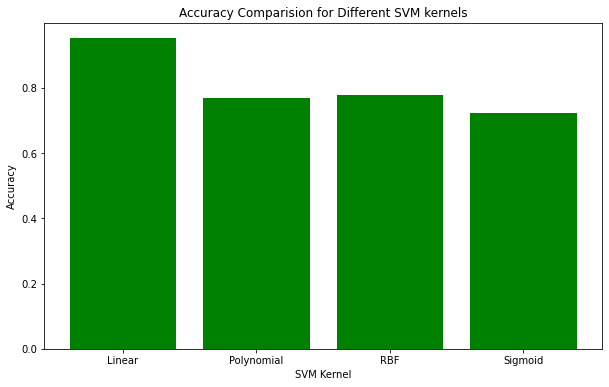

In [21]:
accuracy_linear = accuracy_score(Y_test, pred_test_linear)
accuracy_rbf = accuracy_score(Y_test, pred_test_poly)
accuracy_poly = accuracy_score(Y_test, pred_test_rbf)
accuracy_sigmoid = accuracy_score(Y_test, pred_test_sigmoid)

Kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]

#Bar plot
plt.figure(figsize=(10, 6))
plt.bar(Kernels, accuracies, color='green')
plt.title('Accuracy Comparision for Different SVM kernels')
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.show()

In [22]:
max_accuracy_kernel = max([('Linear', accuracy_linear), ('RBF', accuracy_rbf), ('Polynomial', accuracy_poly), ('Sigmoid', accuracy_sigmoid)], key=lambda x: x[1])
print(f'\nKernel with the highest accuracy: {max_accuracy_kernel[0]} ({max_accuracy_kernel[1]:.2%})')


Kernel with the highest accuracy: Linear (95.19%)


In [23]:
# Print classification report
print("Classification Report:\n", classification_report(Y_test, pred_test_linear))

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.96      0.97        76
           2       0.90      0.93      0.91        28

    accuracy                           0.95       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104



In [24]:
y = Y_train.to_numpy()

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [26]:
model_linear.fit(X_pca, y)

SVC(kernel='linear')

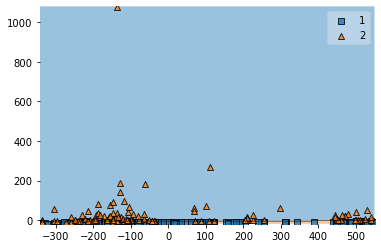

In [28]:
plot_decision_regions(X_pca, y, clf=model_linear)
plt.show()